In [1]:
from model import Users, Posts, Replies, Topics, TopicUser
from peewee import *

In [2]:
p = (Posts.select(fn.Count(Posts.id).alias('pcount'), fn.strftime('%Y%m%d', Posts.updated_at).alias('date'))
     .where(SQL('date').is_null(False))
     .group_by(SQL('date'))
     .order_by(SQL('date')))
r = (Replies.select(fn.Count(Replies.id).alias('rcount'), fn.strftime('%Y%m%d', Replies.updated_at).alias('date'))
     .group_by(SQL('date'))
     .order_by(SQL('date')))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pdf = pd.DataFrame(list(p.dicts()))
rdf = pd.DataFrame(list(r.dicts()))

In [4]:
df = pd.merge(pdf, rdf, on='date').set_index('date')
df.index = pd.to_datetime(df.index)
df.tail(7)


,pcount,rcount
date,,
2017-12-25,107,1660
2017-12-26,116,1511
2017-12-27,152,1649
2017-12-28,147,1663
2017-12-29,145,1680
2017-12-30,91,1212
2017-12-31,72,942


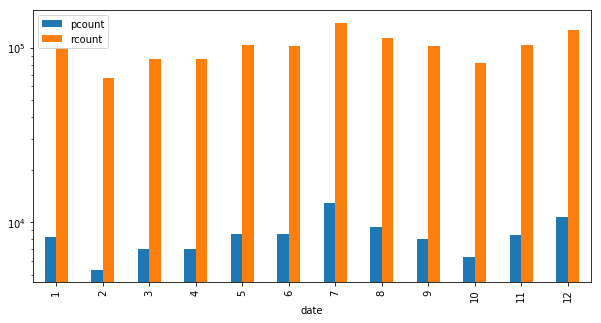

In [5]:
dfm = df.groupby([df.index.month]).sum()
dfm.plot.bar(figsize=(10, 5), logy=True)

In [6]:
dfg = df.groupby([df.index.year, df.index.month]).sum()
dfg['rate'] = dfg.rcount / dfg.pcount

dfg.tail(8)

pcount  rcount       rate
date date                           
2017 5       3231   41740  12.918601
     6       2215   30994  13.992777
     7       1948   26368  13.535934
     8       2072   28288  13.652510
     9       1999   27042  13.527764
     10      1679   22750  13.549732
     11      2633   31831  12.089252
     12      3176   40019  12.600441

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1136f2b70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1137c20f0>], dtype=object)

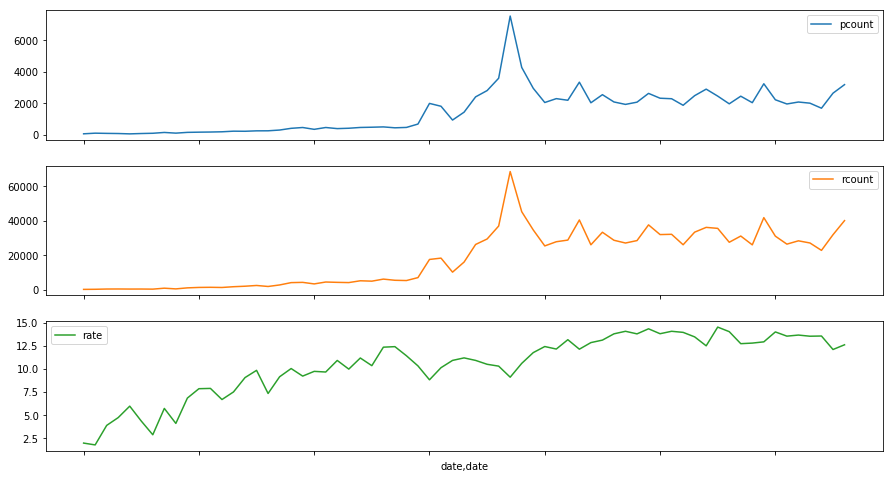

In [7]:
dfg.plot(subplots=True, figsize=(15,9))

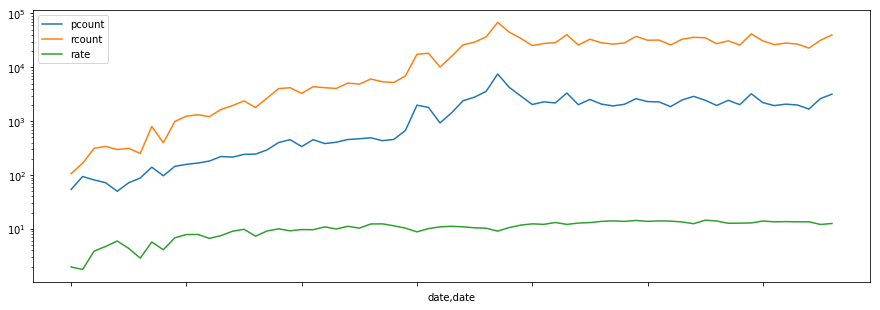

In [8]:
dfg.plot(figsize=(15,5), logy=True)